In [1]:
%cd ..
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import preprocessing as pr

/Users/kemalcankucuk/Documents/kuis-matam-summerproject/gps_timeseries


# Basics of the Preprocessor

In [2]:
parent_path = '../geodesy_data'
pre = pr.Preprocessor(parent_path)

In [3]:
# read individual file
sample = pre.read_tenv_file(pre.tenvs[0])
sample = pre.read_tenv_file('00NA')

In [4]:
sample

,Station ID,Date,Delta E,Delta N,Delta V
0,00NA,08MAR27,-0.000000,0.000000,0.000000
1,00NA,08MAR28,0.000717,0.004027,0.008450
2,00NA,08MAR29,-0.002996,0.003628,0.006840
3,00NA,08MAR30,-0.001808,0.003665,0.009446
4,00NA,08MAR31,0.000027,0.007322,0.015839
...,...,...,...,...,...
3185,00NA,18SEP21,0.382259,0.632339,0.005029
3186,00NA,18SEP22,0.380626,0.630517,0.012494
3187,00NA,18SEP23,0.377591,0.630658,0.008150
3188,00NA,18SEP24,0.382457,0.629258,-0.000452


In [4]:
# load 5 percent of the available tenv files as df
tenvs = pre.load_tenv_file_df(load_percentage=100)
tenvs[0]

,Decimal Year,Delta E,Delta N,Delta V
0,2008.2355,-0.000000,0.000000,0.000000
1,2008.2382,0.000717,0.004027,0.008450
2,2008.2409,-0.002996,0.003628,0.006840
3,2008.2437,-0.001808,0.003665,0.009446
4,2008.2464,0.000027,0.007322,0.015839
...,...,...,...,...
3185,2018.7214,0.382259,0.632339,0.005029
3186,2018.7242,0.380626,0.630517,0.012494
3187,2018.7269,0.377591,0.630658,0.008150
3188,2018.7296,0.382457,0.629258,-0.000452


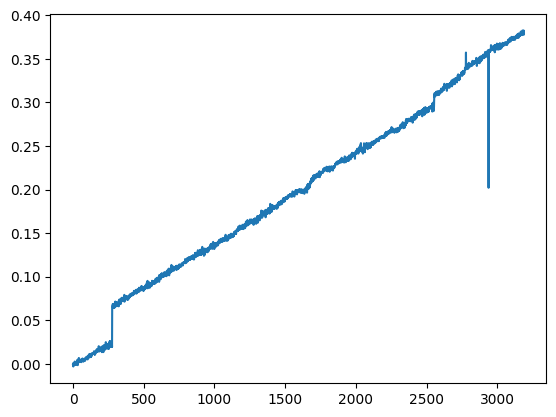

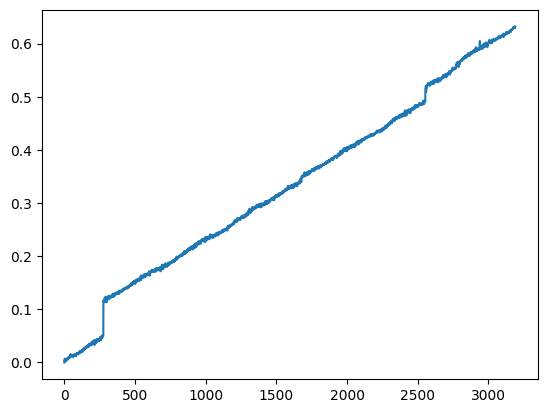

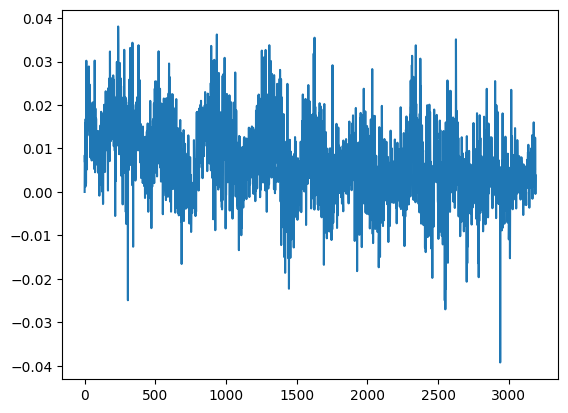

In [5]:
plt.figure(0)
plt.plot(tenvs[0]['Delta E'])
plt.figure(1)
plt.plot(tenvs[0]['Delta N'])
plt.figure(2)
plt.plot(tenvs[0]['Delta V'])

# Gap Tolerance Comparisons

In [6]:
for df in tenvs:
        df['Date'] = df['Decimal Year'].apply(pre.decimal_year_to_date)

In [11]:
from tqdm import tqdm
filtered_stats_per_tolerance = []
tolerances = []
for i in tqdm(range(10, 150, 10)):
    filtered_tenvs, stations_with_gaps = pre.ayikla_pirincin_tasini(tenvs, gap_tolerance=i)
    tolerances.append(i)
    filtered_stats_per_tolerance.append(len(stations_with_gaps))

100%|██████████| 14/14 [23:31<00:00, 100.80s/it]


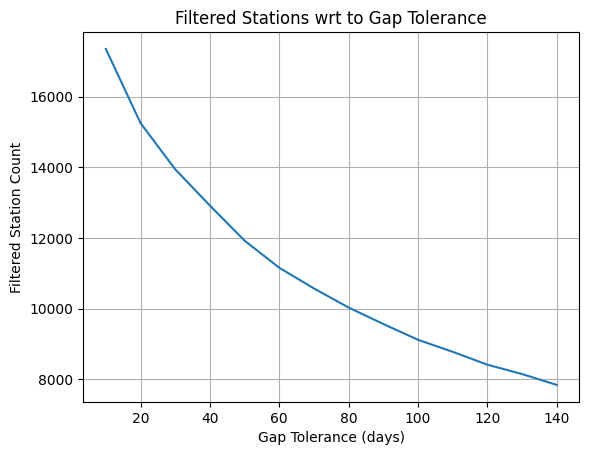

In [14]:
plt.plot(tolerances, filtered_stats_per_tolerance)
plt.title('Filtered Stations wrt to Gap Tolerance')
plt.xlabel('Gap Tolerance (days)')
plt.ylabel('Filtered Station Count')
plt.grid(True)
plt.savefig('outs/gap_tolerance_comparison.png')

In [21]:
with open('outs/tolerances.txt', 'w') as f:
    for i in range(len(tolerances)):
        f.write(f"{tolerances[i]}\t{filtered_stats_per_tolerance[i]}\n")